##### Problem 1: Read in the Sacramento housing data set.

In [2]:
import pandas as pd

shd = pd.read_csv('data/sacramento_housing_data.csv')

shd.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


##### Problem 2: Conduct exploratory data analysis on this data set. Report any notable findings here and any steps you take to clean/process data.

Hint: These EDA checks will be on every data set we give you. If checking for, say, missing/corrupted data over and over, it might be to your long-term benefit to have a function that you can re-use every time you're given some new data.

In [3]:
#right now,  I just want to look at the data types of everything I'm working with
shd.dtypes

street        object
city          object
zip            int64
state         object
beds           int64
baths          int64
sq__ft         int64
type          object
sale_date     object
price          int64
latitude     float64
longitude    float64
dtype: object

In [4]:
#First bit of EDA right here: why is Zipcode an integer? It should probably be treated as an object to make sure pandas doesn't think it's continuous
shd['zip'] = shd['zip'].astype(str)

In [5]:
shd.describe()

,beds,baths,sq__ft,price,latitude,longitude
count,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000
mean,2.911675,1.776650,1312.918782,233715.951269,38.445121,-121.193371
std,1.307932,0.895371,856.123224,139088.818896,5.103637,5.100670
min,0.000000,0.000000,-984.000000,-210944.000000,-121.503471,-121.551704
25%,2.000000,1.000000,950.000000,145000.000000,38.482704,-121.446119
50%,3.000000,2.000000,1304.000000,213750.000000,38.625932,-121.375799
75%,4.000000,2.000000,1718.000000,300000.000000,38.695589,-121.294893
max,8.000000,5.000000,5822.000000,884790.000000,39.020808,38.668433


Looks like we have some pretty crappy data. Either that or Sacramento is running a massive housing scam with negative sq feet and houses with 0 beds and baths. There also appears to be a house in Antarctica, which is _probably_ not true, unless there was an annexation I missed.   

In [6]:
#Let's take a look at these houses with no bedrooms
shd[shd['beds'] == 0]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
73,17 SERASPI CT,SACRAMENTO,95834,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,206000,38.631481,-121.501880
89,2866 KARITSA AVE,SACRAMENTO,95833,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,244500,38.626671,-121.525970
100,12209 CONSERVANCY WAY,RANCHO CORDOVA,95742,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,263500,38.553867,-121.219141
121,5337 DUSTY ROSE WAY,RANCHO CORDOVA,95742,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,320000,38.528575,-121.228600
126,2115 SMOKESTACK WAY,SACRAMENTO,95833,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,339500,38.602416,-121.542965
133,8082 LINDA ISLE LN,SACRAMENTO,95831,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,370000,38.477200,-121.521500
147,9278 DAIRY CT,ELK GROVE,95624,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,445000,38.420338,-121.363757
153,868 HILDEBRAND CIR,FOLSOM,95630,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,585000,38.670947,-121.097727
169,14788 NATCHEZ CT,RANCHO MURIETA,95683,CA,0,0,0,Residential,Tue May 20 00:00:00 EDT 2008,97750,38.492287,-121.100032
192,5201 LAGUNA OAKS DR Unit 126,ELK GROVE,95758,CA,0,0,0,Condo,Tue May 20 00:00:00 EDT 2008,145000,38.423251,-121.444489


Given the large value of houses that have 0 beds, 0 baths and 0 square feet I am going to make an assumption that these are plots of land that have yet to have anything built on them.

Based on this assumption, I feel pretty okay about keeping them in my dataset.

In [8]:
# what about those houses where they'll pay YOU?
shd[shd['price'] < 1]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
703,1900 DANBROOK DR,SACRAMENTO,95835,AC,1,1,-984,Condo,Fri May 16 00:00:00 EDT 2008,-210944,-121.503471,38.668433


In [9]:
# And the negative square feet?
shd[shd['sq__ft'] < 0]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
703,1900 DANBROOK DR,SACRAMENTO,95835,AC,1,1,-984,Condo,Fri May 16 00:00:00 EDT 2008,-210944,-121.503471,38.668433


Looks like the house with a negative price is also the one with a negative square footage, and the one in AC.

We can either assume that the data was entered improperly and is meant to be possitive, or we can drop the data.

In [11]:
# Let me check if any other values are labelled incorrectly
shd[shd['state'] != 'CA']
#It's just Danbrook

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
703,1900 DANBROOK DR,SACRAMENTO,95835,AC,1,1,-984,Condo,Fri May 16 00:00:00 EDT 2008,-210944,-121.503471,38.668433


In [12]:
#I'm a sucker for punishment, so let's fix this!

shd.replace(to_replace=-984, value=984, inplace=True, limit=None, regex=False)
shd.replace(to_replace=-210944, value=210944, inplace=True, limit=None, regex=False)
shd.replace(to_replace="AC", value="CA", inplace=True, limit=None, regex=False, method='pad')


##### Problem 3: Our goal will be to predict price. List the variables that qualify as available predictors in a SLR model. For each of these variables you believe to be valid potential predictors in an SLR model, generate a plot showing the relationship between the independent variable and dependent variable.

I'd say we can use 'beds','baths', and 'sq__ft'

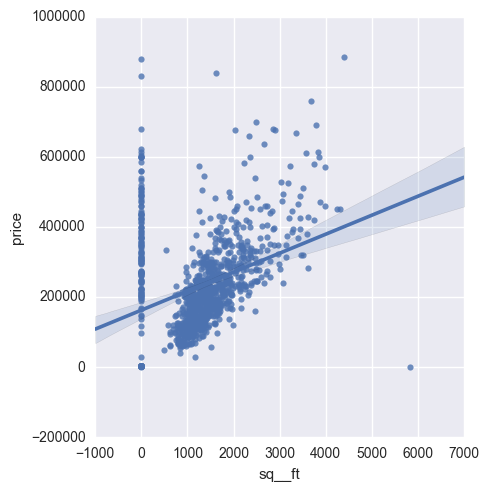

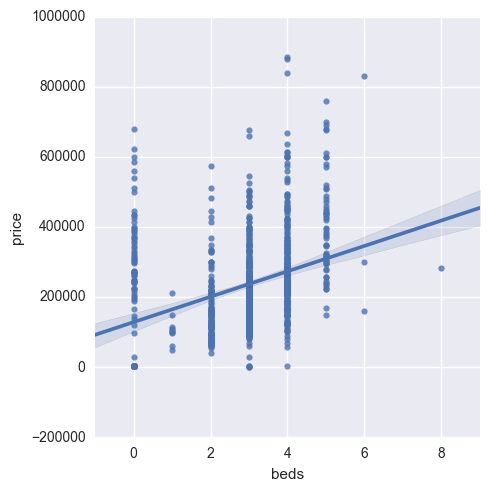

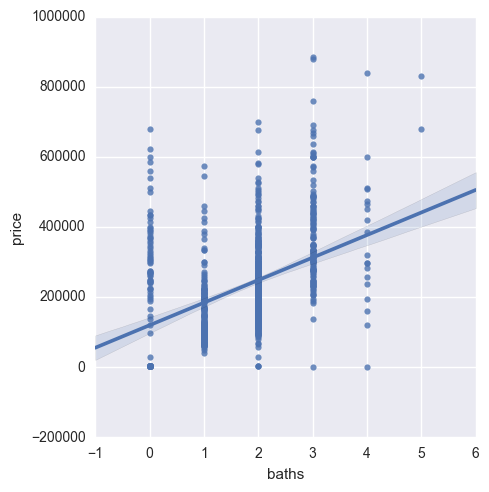

In [17]:
import seaborn as sns
% matplotlib inline
sns.lmplot(x = 'sq__ft', y = 'price', data = shd ) #seaborn lmplot gives us a line of best fit because seaborn is great!
sns.lmplot(x = 'beds', y = 'price', data = shd )
sns.lmplot(x = 'baths', y = 'price', data = shd )

In [37]:
shd.to_csv('data/sacramento_data_clean.csv') 
#just in case anyone wants to know how to save datasets you've cleaned

##### Problem 4: Which independent variable would be the best predictor of Y in a SLR model? Why?

I'm not going to be able to make any judgements by just staring at lines of best fit because this is the easiest way to go cross-eyed. Let's look at correlation instead


In [22]:
shd.corr(method='pearson', min_periods=1)

#based on this, it looks like number of baths is the most predictive as because it has the highest correlation with price

,beds,baths,sq__ft,price,latitude,longitude
beds,1.000000,0.839650,0.684041,0.342024,0.038315,-0.048107
baths,0.839650,1.000000,0.665690,0.416208,0.020946,-0.027232
sq__ft,0.684041,0.665690,1.000000,0.333897,0.001451,-0.017198
price,0.342024,0.416208,0.333897,1.000000,0.004220,0.002361
latitude,0.038315,0.020946,0.001451,0.004220,1.000000,-0.998927
longitude,-0.048107,-0.027232,-0.017198,0.002361,-0.998927,1.000000


In [19]:
#how about if we had assumed the 0 square feet observations were errors? 
shd_no_zero = shd[(shd.sq__ft > 1)]

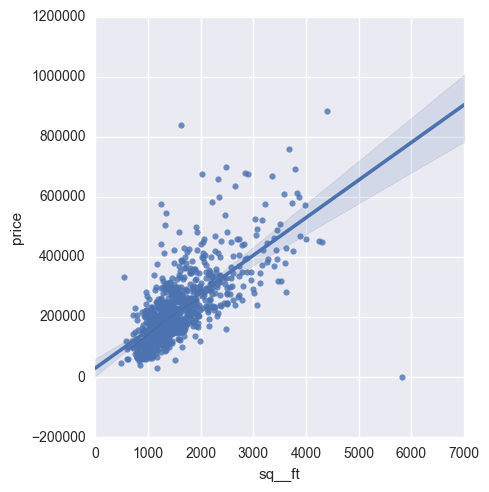

In [20]:
sns.lmplot(x = 'sq__ft', y = 'price', data = shd_no_zero )

In [23]:
#let's also look at this numerically, too because numbers are sometimes better than visuals
shd_no_zero.corr(method='pearson', min_periods=1)


,beds,baths,sq__ft,price,latitude,longitude
beds,1.000000,0.654746,0.695710,0.441988,0.090044,-0.091274
baths,0.654746,1.000000,0.724631,0.501820,0.048521,-0.048055
sq__ft,0.695710,0.724631,1.000000,0.693708,0.029781,-0.029216
price,0.441988,0.501820,0.693708,1.000000,0.006737,0.000517
latitude,0.090044,0.048521,0.029781,0.006737,1.000000,-0.999354
longitude,-0.091274,-0.048055,-0.029216,0.000517,-0.999354,1.000000


##### Problem 5: Build a function that will take in lists Y and X and returns the estimates that minimize SSE. Test your function on price and the variable you determined was best in Problem 4. Report the slope and Y-intercept.

In [29]:
# Gets the optimal slope and y intercept

def lin_reg(x,y):
    # Necessary imports so this can work as a standalone
    import numpy as np
    import scipy.stats
    
    # Using other libraries for standard deviation and pearson correlation coef.
    beta_1 = (scipy.stats.pearsonr(x,y)[0])*(np.std(y)/np.std(x))
    # Pearson Co. Coef returns a tuple so it needs to be sliced/indexed
    beta_0 = np.mean(y)-(beta_1*np.mean(x)) 
    
    #Print the optimal values
    print 'The optimal y-intercept is ', beta_0
    print 'The optimal slope is ', beta_1

In [30]:
lin_reg(shd['baths'], shd['price'])

The optimal y-intercept is  119872.754656
The optimal slope is  64318.5352367


In [31]:
lin_reg(shd_no_zero['sq__ft'],shd_no_zero['price'])

The optimal y-intercept is  30210.6338669
The optimal slope is  125.21648668


##### Problem 6: Interpret the Y-intercept. Does it make sense to interpret the Y-intercept here?

The y-intercept here suggests that, if x is zero, y would be 29984. So, if baths/square footage is zero, the price will be either 119872 (or 30210).

I'll leave it up to you to decide if that makes sense, because I really don't know much about the way the housing market works. 

##### Problem 7: Give an example of how this model could be used for prediction and how this model could be used for inference. Be sure to make it clear which example is associated with prediction and which is associated with inference.

Prediction: could use it to predict how much a house would sell by based on how many square feet it is Inference: could use it to infer square feet based on price of the house

##### Bonus: Using the model you came up with in Problem 5, calculate and plot the residuals.

In [33]:
# Creating a list of predicted values
y_pred = []

for x in shd['baths']:
    y = 119872.754656 + (64318.5352367*x)
    y_pred.append(y)


In [34]:
# Appending the predicted values to the sacramento housing dataframe to make calculating 100x easier using pandas
shd['Pred'] = y_pred

# Residuals equals the difference between Y-True and Y-Pred
shd['Residuals'] = shd['price']-shd['Pred']

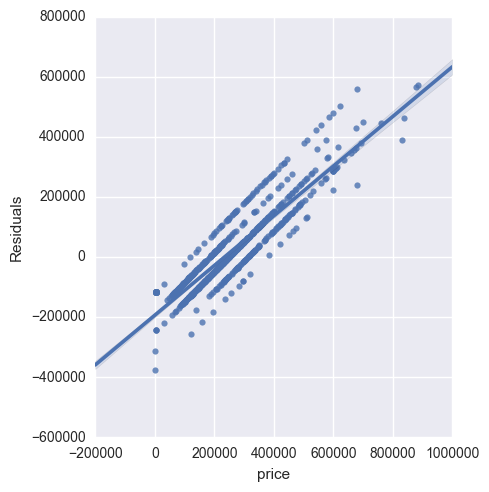

In [35]:
#Plotting the residual differences against price.
import seaborn as sns
%matplotlib inline
sns.lmplot(x= 'price', y = 'Residuals', data = shd)